# Gender Representation in Video Games Analysis

This notebook analyzes gender representation in video games using a dataset from Kaggle. We'll examine gender distribution among characters, representation in different roles, sexualization patterns, and explore how these factors correlate with game ratings. The analysis includes descriptive statistics, data visualization, and machine learning models (both regression and classification) to identify patterns in gender representation across the gaming industry.

In [ ]:
import kagglehub

print("Downloading dataset...")
path = kagglehub.dataset_download("br33sa/gender-representation-in-video-games")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/br33sa/gender-representation-in-video-games/versions/3


## Data Acquisition

In this section, we download the dataset from Kaggle using the kagglehub API. The dataset contains information about gender representation in video games.

In [ ]:
import os

dataset_route = path
files = os.listdir(dataset_route)
print('Files in dataset:', files)

Files in dataset: ['Metadata- Gender Representation in Video Games.pdf', 'sexualization.grivg.csv', 'games.grivg.csv', 'characters.grivg.csv']


## Dataset Exploration

Let's examine the structure of our dataset by listing the available files.

In [ ]:
import pandas as pd

print("Loading datasets...")
games_df = pd.read_csv(os.path.join(dataset_route, 'games.grivg.csv'))
characters_df = pd.read_csv(os.path.join(dataset_route, 'characters.grivg.csv'))
sexualization_df = pd.read_csv(os.path.join(dataset_route, 'sexualization.grivg.csv'))

if games_df is None or characters_df is None or sexualization_df is None:
    print("Error loading dataset")
else:
    print("Datasets loaded successfully")

Loading datasets...
Datasets loaded successfully


### Loading Dataset Files

The dataset consists of three main files:
1. **games.grivg.csv**: Information about games, their ratings, and overall gender representation
2. **characters.grivg.csv**: Data about individual characters, their gender, roles, and playability
3. **sexualization.grivg.csv**: Metrics related to character sexualization

In [ ]:
print("Games dataset:")
print(games_df.head())
print("\nCharacters dataset:")
print(characters_df.head())
print("\nSexualization dataset:")
print(sexualization_df.head())

Games dataset:
  Game_Id                         Title Release        Series  \
0    GTAV            Grand Theft Auto V  Nov-13           GTA   
1     PSS          Pokémon Sword/Shield  Nov-19       Pokémon   
2   CODMW  Call of Duty: Modern Warfare  Oct-19  Call of Duty   
3    RDR2         Red Dead Redemption 2  Dec-18      Red Dead   
4     SMO           Super Mario Odyssey  Oct-17   Super Mario   

              Genre         Sub-genre         Developer       Publisher  \
0  Action-adventure  Action-adventure    Rockstar North  Rockstar Games   
1               RPG               RPG        Game Freak        Nintendo   
2            Action               FPS     Infinity Ward      Activision   
3  Action-adventure  Action-adventure  Rockstar Studios  Rockstar Games   
4  Action-adventure  Action-adventure      Nintendo EDP        Nintendo   

  Country         Platform  ...  Director Total_team  female_team  \
0     GBR            Multi  ...         M          7            0   
1    

### Dataset Preview

Let's take a look at the first few rows of each dataset to understand their structure and content.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colab-specific settings
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})

## Data Visualization Setup

We'll use matplotlib and seaborn libraries for creating visualizations. Here we set up the visualization environment with appropriate styling parameters.

In [ ]:
print("\n--- PREPROCESSING THE DATA ---")
# Handle missing values - perform more sophisticated handling
print("Missing values before treatment:")
print("Games dataset:", games_df.isna().sum().sum())
print("Characters dataset:", characters_df.isna().sum().sum())
print("Sexualization dataset:", sexualization_df.isna().sum().sum())

# Fill numeric columns with median, categorical with mode
numeric_cols = games_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    games_df[col] = games_df[col].fillna(games_df[col].median())

# Other columns with 0 or appropriate values
games_df = games_df.fillna(0)
characters_df = characters_df.fillna(0)
sexualization_df = sexualization_df.fillna(0)

print("Missing values after treatment:")
print("Games dataset:", games_df.isna().sum().sum())
print("Characters dataset:", characters_df.isna().sum().sum())
print("Sexualization dataset:", sexualization_df.isna().sum().sum())

# Convert 'Avg_Reviews' to numeric values
games_df['Avg_Reviews'] = pd.to_numeric(games_df['Avg_Reviews'], errors='coerce')

# Convert percentage strings to float
games_df['Percentage_non_male'] = games_df['Percentage_non_male'].astype(str).str.rstrip('%').astype('float') / 100.0

# Merge datasets on relevant keys
merged_df = games_df.merge(characters_df, left_on='Game_Id', right_on='Game')
merged_df = merged_df.merge(sexualization_df, left_on='Id', right_on='Id')

print("\n--- DESCRIPTIVE ANALYSIS ---")
# Basic statistics for key variables
print("Summary statistics for numeric variables in games dataset:")
print(games_df.describe().round(2))

print("\nGender distribution in characters:")
gender_dist = characters_df['Gender'].value_counts(normalize=True).round(3) * 100
print(gender_dist)

print("\nPlayable character distribution:")
playable_dist = characters_df['Playable'].value_counts(normalize=True).round(3) * 100
print(f"Playable: {playable_dist[1]:.1f}%, Non-playable: {playable_dist[0]:.1f}%")

print("\nSexualization score statistics:")
print(sexualization_df['Total'].describe().round(2))

# Detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

rating_outliers = detect_outliers(games_df, 'Avg_Reviews')
print(f"\nNumber of outliers in Average Reviews: {len(rating_outliers)}")
if len(rating_outliers) > 0:
    print("Outliers in Average Reviews:")
    print(rating_outliers[['Title', 'Avg_Reviews']])

sex_outliers = detect_outliers(sexualization_df, 'Total')
print(f"\nNumber of outliers in Sexualization Total: {len(sex_outliers)}")
if len(sex_outliers) > 0:
    print("Top 5 outliers in Sexualization:")
    print(sex_outliers.sort_values('Total', ascending=False)[['Id', 'Total']].head())


--- PREPROCESSING THE DATA ---
Missing values before treatment:
Games dataset: 112
Characters dataset: 0
Sexualization dataset: 0
Missing values after treatment:
Games dataset: 0
Characters dataset: 0
Sexualization dataset: 0

--- DESCRIPTIVE ANALYSIS ---
Summary statistics for numeric variables in games dataset:
        PEGI  Protagonist  Protagonist_Non_Male  Relevant_males  \
count  64.00        64.00                 64.00           64.00   
mean   13.48         1.25                  0.55            6.14   
std     4.61         0.59                  0.56            3.94   
min     3.00         1.00                  0.00            0.00   
25%     7.00         1.00                  0.00            3.00   
50%    16.00         1.00                  1.00            6.00   
75%    18.00         1.00                  1.00            8.25   
max    18.00         4.00                  2.00           17.00   

       Relevant_no_males  Percentage_non_male  Total_team  female_team  \
count 

## Data Preprocessing and Descriptive Analysis

Before building models, we need to clean the data by handling missing values, converting data types, and merging datasets. We'll also perform descriptive analysis to understand key variables and identify potential outliers.


--- ENHANCED VISUALIZATIONS ---


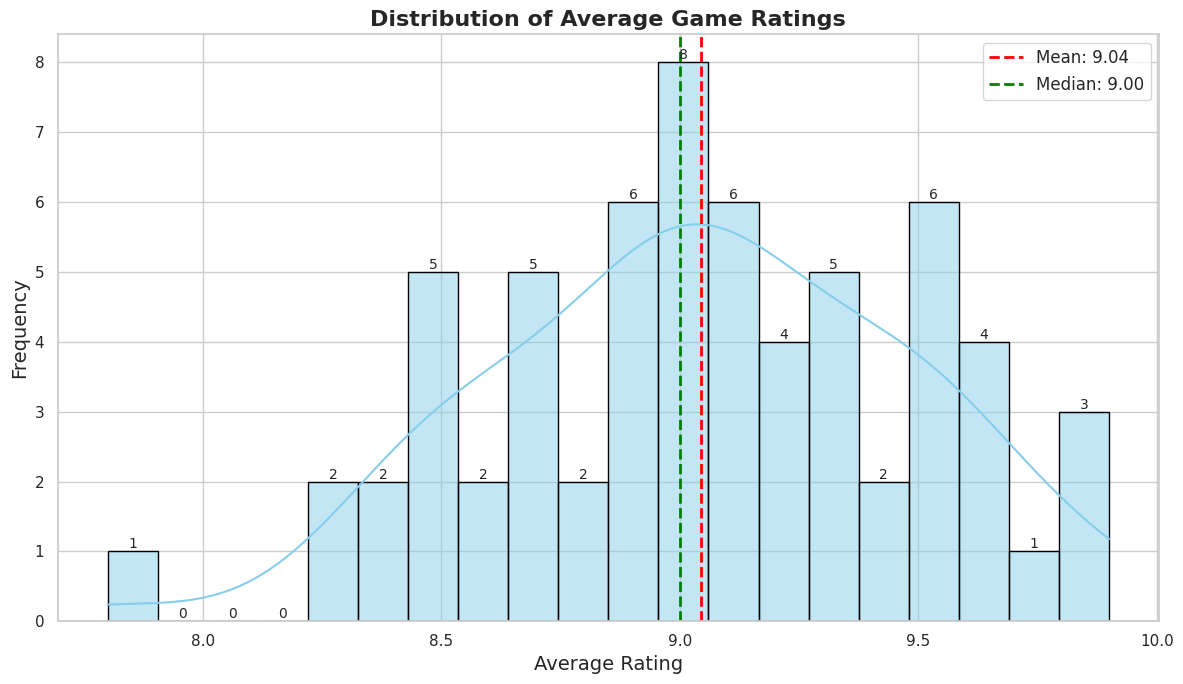

In [ ]:
print("\n--- ENHANCED VISUALIZATIONS ---")

# 1. Enhanced Game Ratings Distribution
plt.figure(figsize=(12, 7))
ax = sns.histplot(games_df['Avg_Reviews'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Game Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add mean and median lines with annotations
mean = games_df['Avg_Reviews'].mean()
median = games_df['Avg_Reviews'].median()
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.legend(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()

## Data Visualizations

### 1. Game Ratings Distribution

This visualization shows the distribution of average game ratings, including the mean and median values.

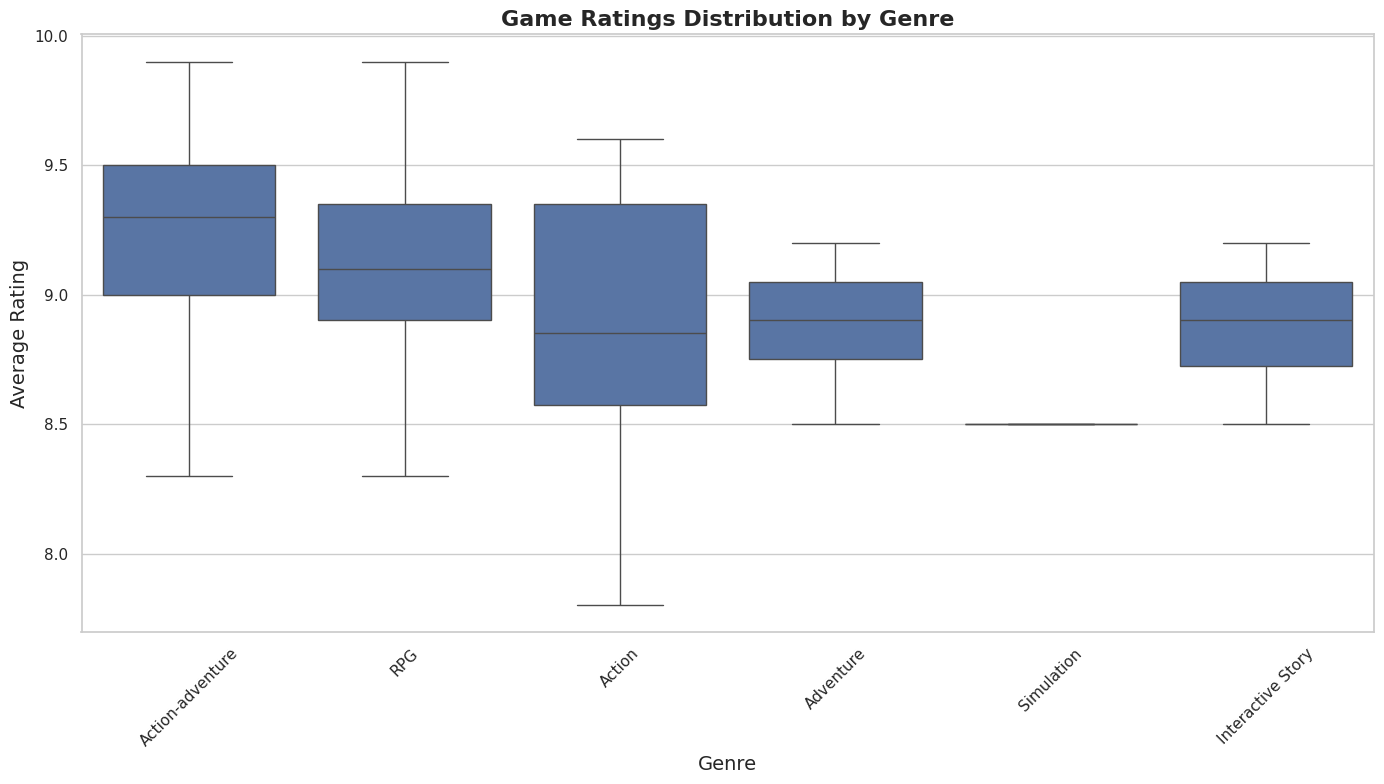

In [ ]:
# 2. Boxplot of ratings by genre
plt.figure(figsize=(14, 8))
sns.boxplot(data=games_df, x='Genre', y='Avg_Reviews')
plt.title('Game Ratings Distribution by Genre', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

### 2. Game Ratings by Genre

This boxplot compares game ratings across different genres, helping us identify which genres tend to have higher ratings and greater rating variability.

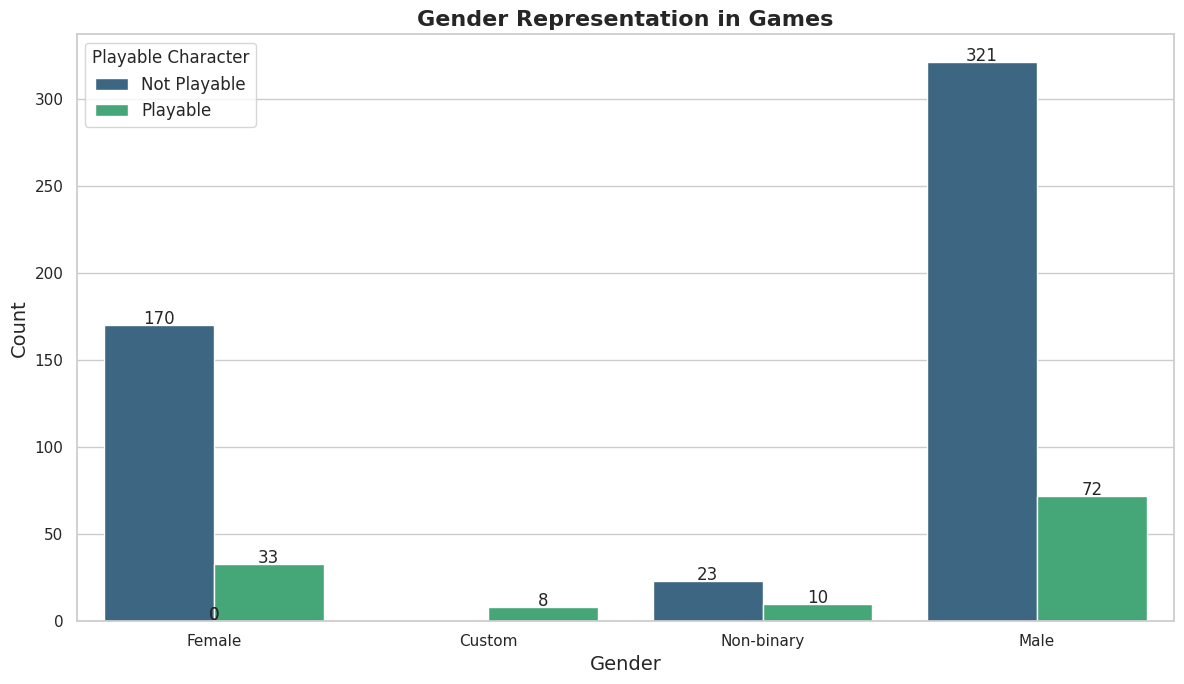

In [ ]:
# 3. Gender representation
plt.figure(figsize=(12, 7))
palette = sns.color_palette("viridis", 2)
ax = sns.countplot(data=characters_df, x='Gender', hue='Playable', palette=palette)
plt.title('Gender Representation in Games', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add value annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.5,
            '{:1.0f}'.format(height),
            ha="center", fontsize=12)

plt.legend(title='Playable Character', labels=['Not Playable', 'Playable'], fontsize=12)
plt.tight_layout()

### 3. Gender Representation Analysis

This bar chart analyzes gender representation in games, distinguishing between playable and non-playable characters.

<ipython-input-45-844c9056dd80>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_sex_data, x='Gender', y='Total', palette='viridis')


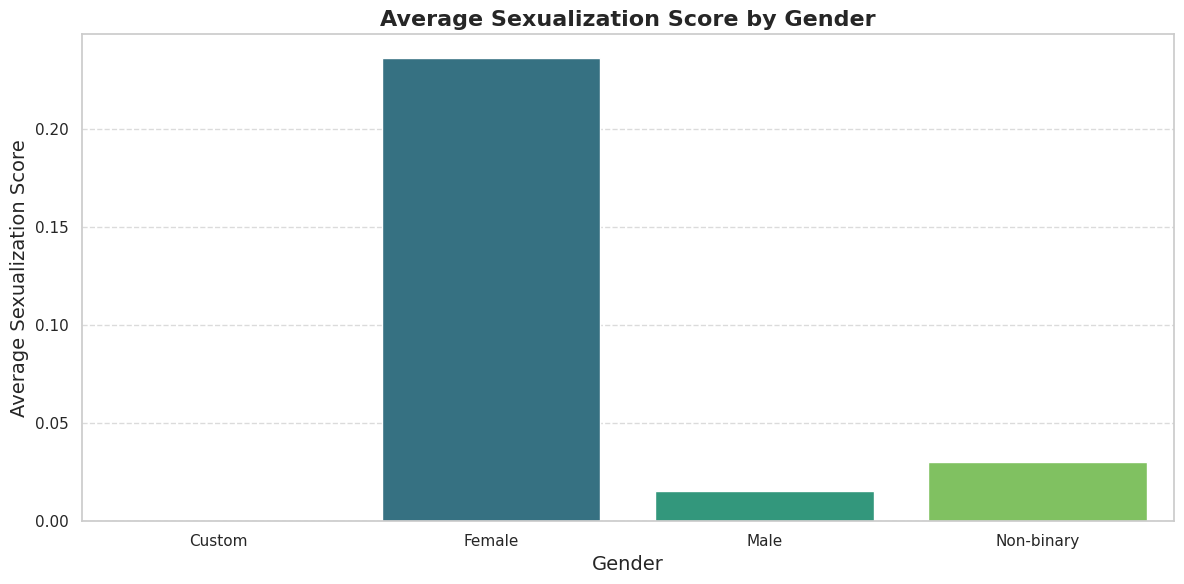

In [ ]:
# 4. Sexualization by gender
plt.figure(figsize=(12, 6))
gender_sex_data = merged_df.groupby('Gender')['Total'].mean().reset_index()
sns.barplot(data=gender_sex_data, x='Gender', y='Total', palette='viridis')
plt.title('Average Sexualization Score by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Sexualization Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


### 4. Sexualization by Gender

This visualization compares average sexualization scores across gender categories, highlighting potential gender biases in character portrayal.

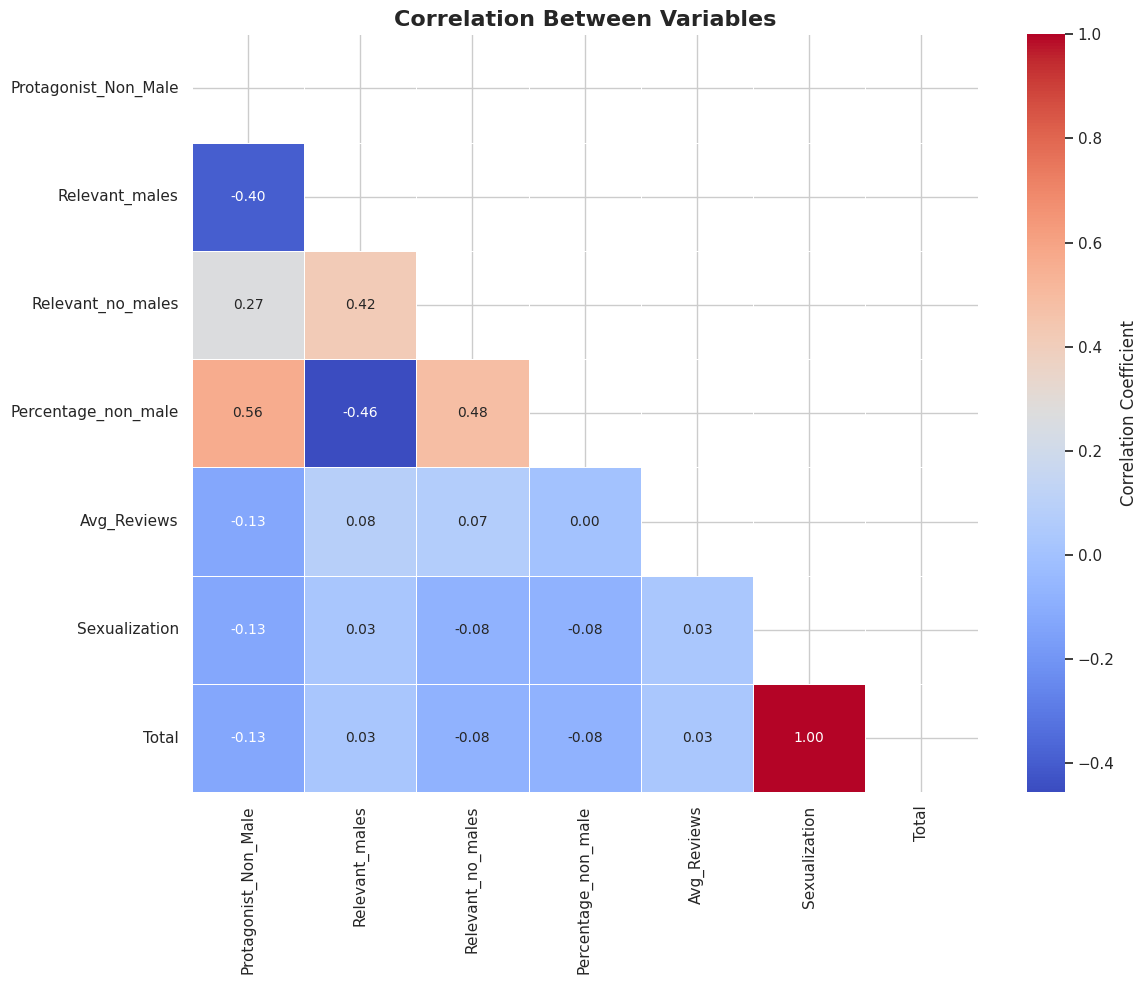

In [ ]:
import numpy as np

# 5. Correlation heatmap for numerical variables
plt.figure(figsize=(12, 10))
numeric_cols = ['Protagonist_Non_Male', 'Relevant_males', 'Relevant_no_males',
                'Percentage_non_male', 'Avg_Reviews', 'Sexualization', 'Total']

# Create correlation matrix from merged data
corr_matrix = merged_df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Use a more appealing colormap and add annotations
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            mask=mask, cbar_kws={'label': 'Correlation Coefficient'},
            linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Between Variables', fontsize=16, fontweight='bold')
plt.tight_layout()

### 5. Correlation Analysis

This heatmap visualizes correlations between numerical variables in the dataset, helping us identify relationships between gender representation, sexualization, and game ratings.

<Figure size 1600x1200 with 0 Axes>

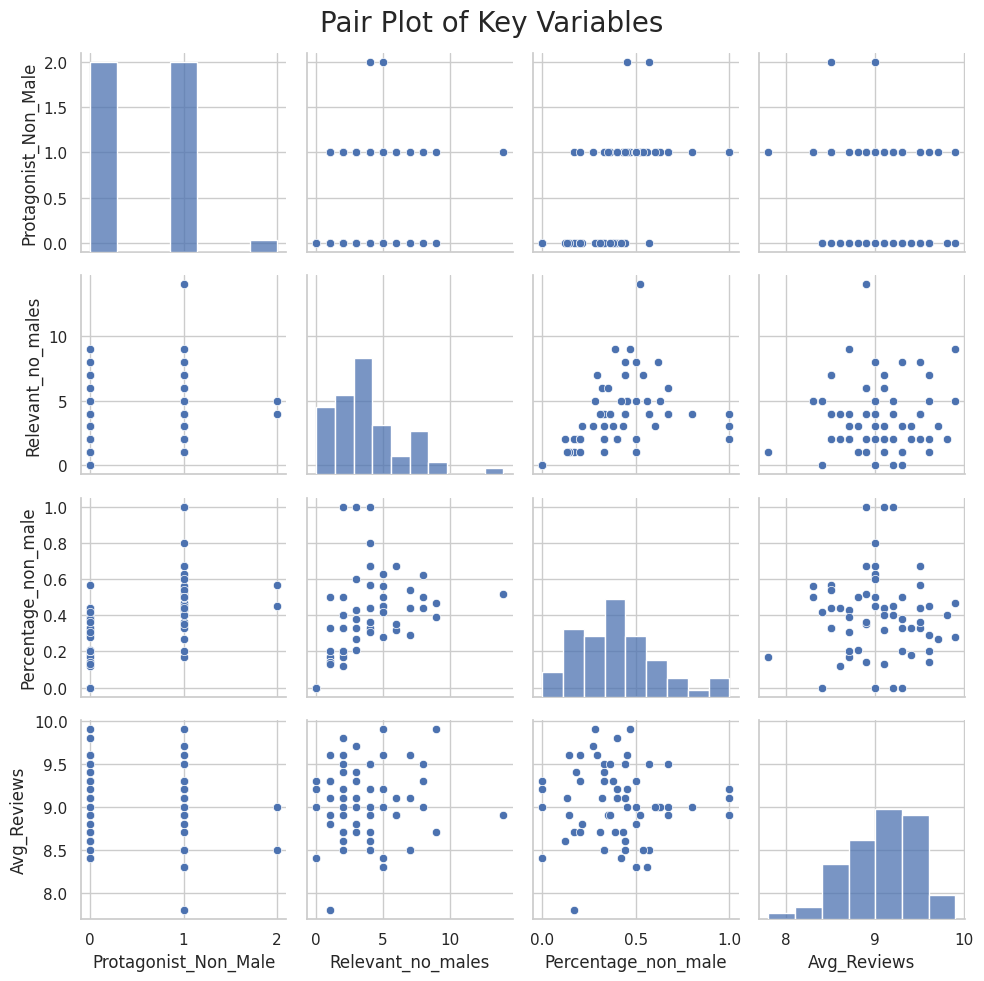

In [ ]:
# 6. Pair plot for key variables
plt.figure(figsize=(16, 12))
sns.pairplot(games_df[['Protagonist_Non_Male', 'Relevant_no_males', 'Percentage_non_male', 'Avg_Reviews']])
plt.suptitle('Pair Plot of Key Variables', fontsize=20)
plt.tight_layout()

### 6. Pair Plot for Key Variables

This pair plot shows relationships between key variables related to gender representation and game ratings, providing multiple perspectives on how these variables interact.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import (mean_squared_error, r2_score, classification_report,
                           accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                           precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

print("\n--- REGRESSION MODELS: PREDICTING GAME RATINGS ---")
# Define features and target for regression
X_reg = games_df[['Protagonist_Non_Male', 'Relevant_males', 'Relevant_no_males', 'Percentage_non_male']]
y_reg = games_df['Avg_Reviews']

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

print("\n1. Linear Regression")
# Linear Regression with cross-validation
lr = LinearRegression()
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train_reg, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {lr_cv_scores.round(3)}")
print(f"Average CV R²: {lr_cv_scores.mean():.3f}")

lr.fit(X_train_scaled, y_train_reg)
y_pred_lr = lr.predict(X_test_scaled)

print("Test set results:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_lr):.3f}")
print(f"R² Score: {r2_score(y_test_reg, y_pred_lr):.3f}")

# Feature importance for linear regression
print("\nFeature importance (coefficients):")
for feature, importance in zip(X_reg.columns, lr.coef_):
    print(f"{feature}: {importance:.3f}")

print("\n2. Ridge Regression")
# Ridge Regression with hyperparameter tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train_reg)

print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best CV R²: {ridge_grid.best_score_:.3f}")

ridge_best = ridge_grid.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_scaled)

print("Test set results:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_ridge):.3f}")
print(f"R² Score: {r2_score(y_test_reg, y_pred_ridge):.3f}")

# Feature importance for ridge regression
print("\nFeature importance (coefficients):")
for feature, importance in zip(X_reg.columns, ridge_best.coef_):
    print(f"{feature}: {importance:.3f}")

print("\n3. Decision Tree Regressor")
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train_reg)
y_pred_dt_reg = dt_reg.predict(X_test_scaled)

print("Test set results:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_dt_reg):.3f}")
print(f"R² Score: {r2_score(y_test_reg, y_pred_dt_reg):.3f}")

# Feature importance for decision tree
print("\nFeature importance:")
for feature, importance in zip(X_reg.columns, dt_reg.feature_importances_):
    print(f"{feature}: {importance:.3f}")

# Grid search for decision tree regressor
print("\nOptimizing Decision Tree Regressor...")
dt_reg_params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_reg_grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                          dt_reg_params, cv=5, scoring='r2')
dt_reg_grid.fit(X_train_scaled, y_train_reg)

print(f"Best parameters: {dt_reg_grid.best_params_}")
print(f"Best CV R²: {dt_reg_grid.best_score_:.3f}")

dt_reg_best = dt_reg_grid.best_estimator_
y_pred_dt_reg_tuned = dt_reg_best.predict(X_test_scaled)

print("Test set results after tuning:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_dt_reg_tuned):.3f}")
print(f"R² Score: {r2_score(y_test_reg, y_pred_dt_reg_tuned):.3f}")

print("\nRegression model comparison:")
regression_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Tuned Decision Tree'],
    'MSE': [mean_squared_error(y_test_reg, y_pred_lr),
            mean_squared_error(y_test_reg, y_pred_ridge),
            mean_squared_error(y_test_reg, y_pred_dt_reg),
            mean_squared_error(y_test_reg, y_pred_dt_reg_tuned)],
    'R²': [r2_score(y_test_reg, y_pred_lr),
          r2_score(y_test_reg, y_pred_ridge),
          r2_score(y_test_reg, y_pred_dt_reg),
          r2_score(y_test_reg, y_pred_dt_reg_tuned)]
})
print(regression_results.set_index('Model').round(3))


--- REGRESSION MODELS: PREDICTING GAME RATINGS ---

1. Linear Regression
Cross-validation R² scores: [-0.056 -0.189 -0.304 -0.136 -0.185]
Average CV R²: -0.174
Test set results:
Mean Squared Error: 0.188
R² Score: -0.030

Feature importance (coefficients):
Protagonist_Non_Male: -0.116
Relevant_males: -0.075
Relevant_no_males: 0.035
Percentage_non_male: 0.017

2. Ridge Regression
Best alpha: 100.0
Best CV R²: -0.136
Test set results:
Mean Squared Error: 0.189
R² Score: -0.037

Feature importance (coefficients):
Protagonist_Non_Male: -0.027
Relevant_males: -0.012
Relevant_no_males: -0.003
Percentage_non_male: 0.005

3. Decision Tree Regressor
Test set results:
Mean Squared Error: 0.336
R² Score: -0.846

Feature importance:
Protagonist_Non_Male: 0.143
Relevant_males: 0.298
Relevant_no_males: 0.110
Percentage_non_male: 0.449

Optimizing Decision Tree Regressor...
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV R²: -0.533
Test set results after tuni

## Machine Learning Models

### Regression Analysis: Predicting Game Ratings

In this section, we'll build regression models to predict game ratings based on gender representation features. We'll explore:

1. Linear Regression
2. Ridge Regression (with regularization)
3. Decision Tree Regressor

Each model will be evaluated using metrics like MSE and R², and we'll perform hyperparameter tuning for optimal performance.

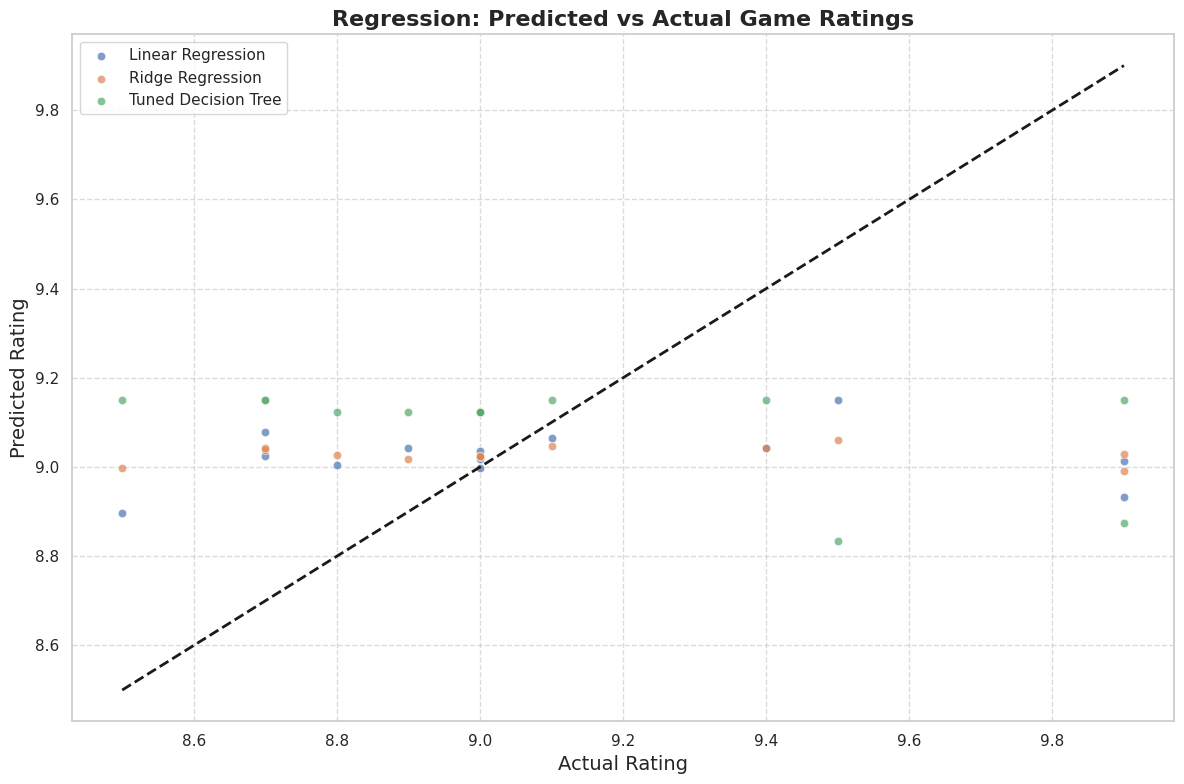

In [ ]:
# Visualize regression results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test_reg, y=y_pred_lr, label='Linear Regression', alpha=0.7)
sns.scatterplot(x=y_test_reg, y=y_pred_ridge, label='Ridge Regression', alpha=0.7)
sns.scatterplot(x=y_test_reg, y=y_pred_dt_reg_tuned, label='Tuned Decision Tree', alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.title('Regression: Predicted vs Actual Game Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Actual Rating', fontsize=14)
plt.ylabel('Predicted Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

### Regression Model Visualization

This scatter plot compares actual vs. predicted game ratings for each regression model, helping us visually assess model performance.

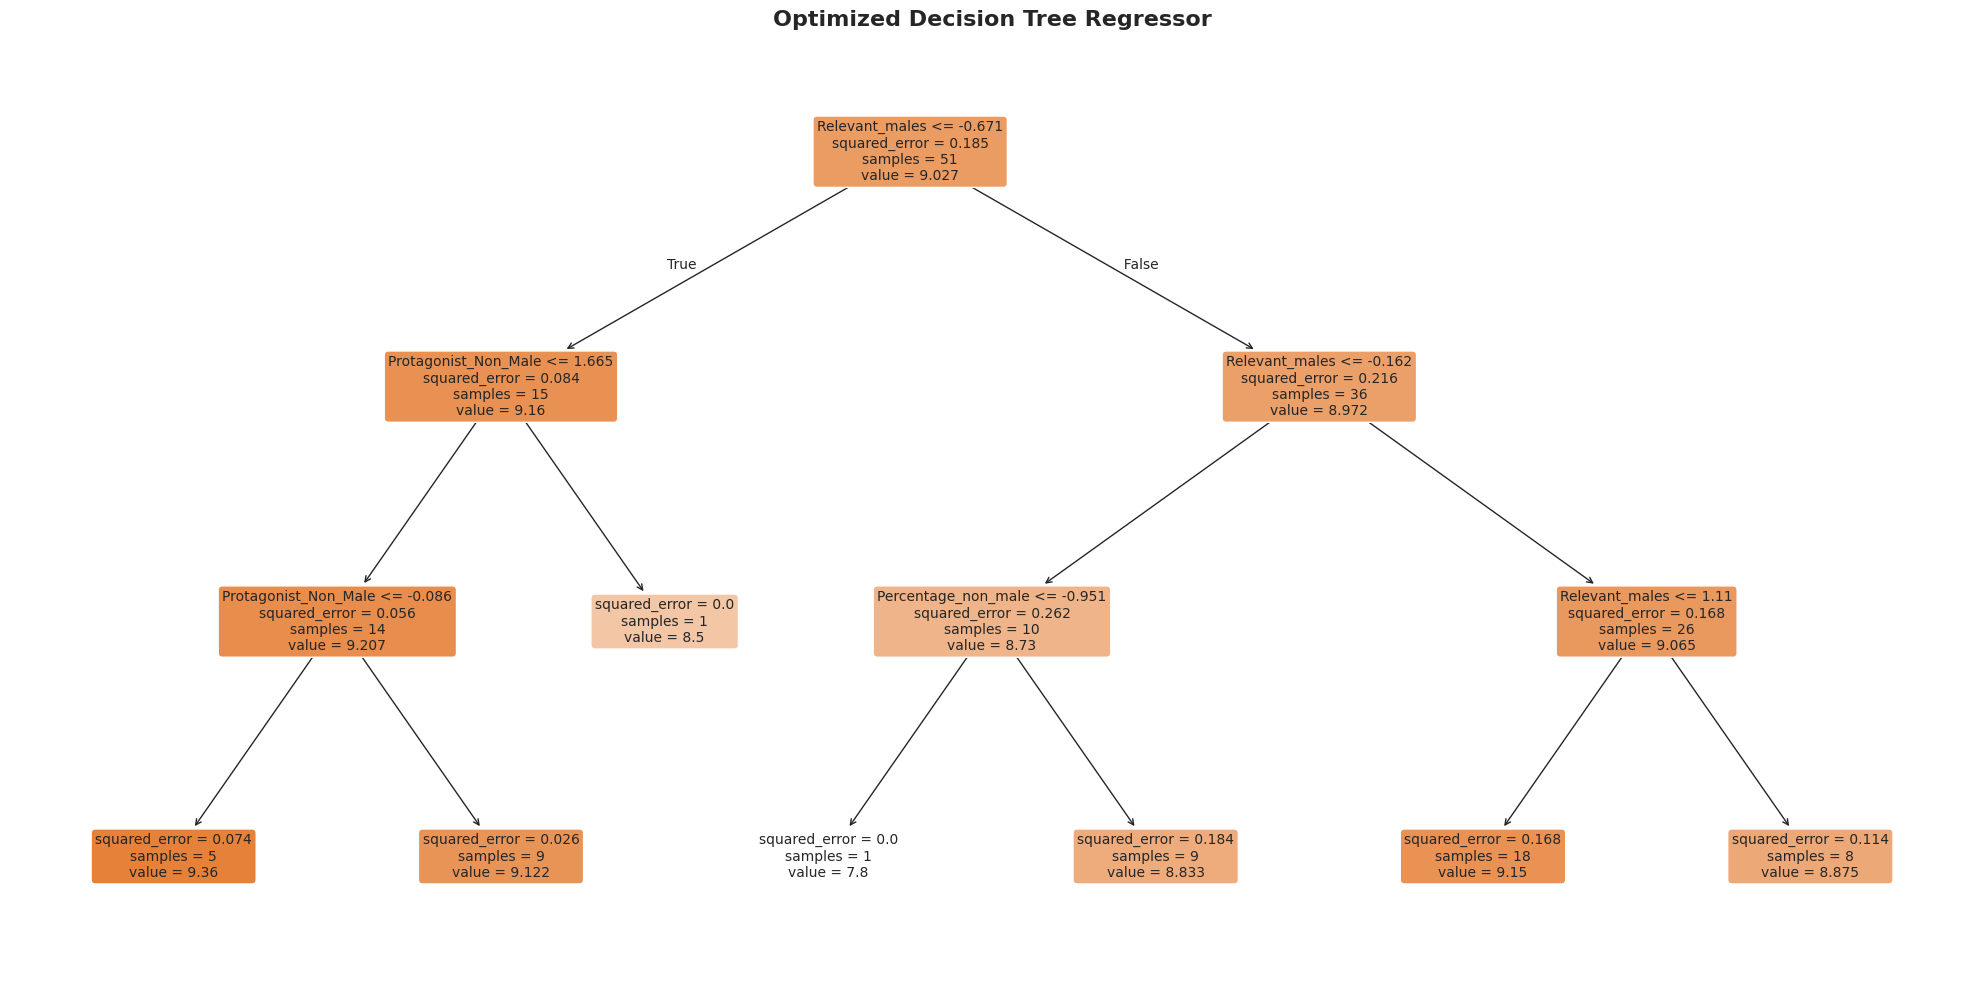

In [ ]:
# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_reg_best, feature_names=X_reg.columns, filled=True, rounded=True, fontsize=10)
plt.title('Optimized Decision Tree Regressor', fontsize=16, fontweight='bold')
plt.tight_layout()

### Decision Tree Visualization

This visualization shows the structure of our optimized decision tree regressor, revealing how it makes predictions based on feature values.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("\n--- CLASSIFICATION MODELS: PREDICTING CHARACTER ROLES ---")
# Encode categorical variables properly
label_encoder = LabelEncoder()
merged_df['Gender_encoded'] = label_encoder.fit_transform(merged_df['Gender'])
merged_df['Age_encoded'] = label_encoder.fit_transform(merged_df['Age'])
merged_df['Species_encoded'] = label_encoder.fit_transform(merged_df['Species'])

# Define features and target for classification
X_clf = merged_df[['Gender_encoded', 'Age_encoded', 'Species_encoded', 'Playable', 'Total']]
y_clf = merged_df['Relevance']

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Scale features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print("\nClass distribution:")
print(y_clf.value_counts(normalize=True).round(3) * 100)

print("\n1. K-Nearest Neighbors")
# Basic KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf_scaled, y_train_clf)
y_pred_knn = knn.predict(X_test_clf_scaled)

print("Test set results:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_knn):.3f}")

# Calculate and display precision, recall, and F1 score for each class
print("\nDetailed classification metrics:")
print(classification_report(y_test_clf, y_pred_knn))

# Grid search for KNN
print("\nOptimizing KNN...")
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_clf_scaled, y_train_clf)

print(f"Best parameters: {knn_grid.best_params_}")
print(f"Best CV accuracy: {knn_grid.best_score_:.3f}")

knn_best = knn_grid.best_estimator_
y_pred_knn_tuned = knn_best.predict(X_test_clf_scaled)

print("Test set results after tuning:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_knn_tuned):.3f}")
print("\nDetailed classification metrics after tuning:")
print(classification_report(y_test_clf, y_pred_knn_tuned))

print("\n2. Decision Tree Classifier")
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_dt = dt_clf.predict(X_test_clf_scaled)

print("Test set results:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_dt):.3f}")
print("\nDetailed classification metrics:")
print(classification_report(y_test_clf, y_pred_dt))

# Feature importance for decision tree classifier
print("\nFeature importance:")
for feature, importance in zip(X_clf.columns, dt_clf.feature_importances_):
    print(f"{feature}: {importance:.3f}")

# Grid search for decision tree classifier
print("\nOptimizing Decision Tree Classifier...")
dt_clf_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_clf_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                          dt_clf_params, cv=5, scoring='accuracy')
dt_clf_grid.fit(X_train_clf_scaled, y_train_clf)

print(f"Best parameters: {dt_clf_grid.best_params_}")
print(f"Best CV accuracy: {dt_clf_grid.best_score_:.3f}")

dt_clf_best = dt_clf_grid.best_estimator_
y_pred_dt_tuned = dt_clf_best.predict(X_test_clf_scaled)

print("Test set results after tuning:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_dt_tuned):.3f}")
print("\nDetailed classification metrics after tuning:")
print(classification_report(y_test_clf, y_pred_dt_tuned))

print("\nClassification model comparison:")
classification_results = pd.DataFrame({
    'Model': ['KNN', 'Tuned KNN', 'Decision Tree', 'Tuned Decision Tree'],
    'Accuracy': [accuracy_score(y_test_clf, y_pred_knn),
                accuracy_score(y_test_clf, y_pred_knn_tuned),
                accuracy_score(y_test_clf, y_pred_dt),
                accuracy_score(y_test_clf, y_pred_dt_tuned)],
    'Precision (macro)': [precision_score(y_test_clf, y_pred_knn, average='macro'),
                        precision_score(y_test_clf, y_pred_knn_tuned, average='macro'),
                        precision_score(y_test_clf, y_pred_dt, average='macro'),
                        precision_score(y_test_clf, y_pred_dt_tuned, average='macro')],
    'Recall (macro)': [recall_score(y_test_clf, y_pred_knn, average='macro'),
                      recall_score(y_test_clf, y_pred_knn_tuned, average='macro'),
                      recall_score(y_test_clf, y_pred_dt, average='macro'),
                      recall_score(y_test_clf, y_pred_dt_tuned, average='macro')],
    'F1 (macro)': [f1_score(y_test_clf, y_pred_knn, average='macro'),
                  f1_score(y_test_clf, y_pred_knn_tuned, average='macro'),
                  f1_score(y_test_clf, y_pred_dt, average='macro'),
                  f1_score(y_test_clf, y_pred_dt_tuned, average='macro')]
})
print(classification_results.set_index('Model').round(3))



--- CLASSIFICATION MODELS: PREDICTING CHARACTER ROLES ---

Class distribution:
Relevance
SC    41.8
MC    31.7
PA    12.6
MA     8.3
SK     2.8
DA     2.8
Name: proportion, dtype: float64

1. K-Nearest Neighbors
Test set results:
Accuracy: 0.500

Detailed classification metrics:
              precision    recall  f1-score   support

          DA       0.50      0.25      0.33         4
          MA       0.00      0.00      0.00        11
          MC       0.38      0.33      0.35        40
          PA       0.73      0.69      0.71        16
          SC       0.52      0.74      0.61        53
          SK       0.00      0.00      0.00         4

    accuracy                           0.50       128
   macro avg       0.36      0.33      0.33       128
weighted avg       0.44      0.50      0.46       128


Optimizing KNN...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best CV accuracy: 0.489
Test set results after tuning:
Accuracy: 0.469

Detailed classification metrics after tuning:
              precision    recall  f1-score   support

          DA       0.00      0.00      0.00         4
          MA       0.00      0.00      0.00        11
          MC       0.36      0.38      0.37        40
          PA       0.77      0.62      0.69        16
          SC       0.51      0.66      0.57        53
          SK       0.00      0.00      0.00         4

    accuracy                           0.47       128
   macro avg       0.27      0.28      0.27       128
weighted avg       0.42      0.47      0.44       128


2. Decision Tree Classifier
Test set results:
Accuracy: 0.516

Detailed classification metrics:
              precision    recall  f1-score   support

          DA       0.00      0.00      0.00         4
          MA       0.00      0.00      0.00        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV accuracy: 0.530
Test set results after tuning:
Accuracy: 0.492

Detailed classification metrics after tuning:
              precision    recall  f1-score   support

          DA       0.50      0.25      0.33         4
          MA       0.00      0.00      0.00        11
          MC       0.25      0.03      0.05        40
          PA       0.58      0.88      0.70        16
          SC       0.48      0.89      0.63        53
          SK       0.00      0.00      0.00         4

    accuracy                           0.49       128
   macro avg       0.30      0.34      0.28       128
weighted avg       0.37      0.49      0.37       128


Classification model comparison:
                     Accuracy  Precision (macro)  Recall (macro)  F1 (macro)
Model                                                                       
KNN                     0.500              0.356 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

### Classification Analysis: Predicting Character Roles

In this section, we'll build classification models to predict character relevance/roles based on features like gender, age, species, playability, and sexualization. We'll explore:

1. K-Nearest Neighbors (KNN)
2. Decision Tree Classifier

Each model will be evaluated using metrics like accuracy, precision, recall, and F1 score, and we'll perform hyperparameter tuning for optimal performance.

<Figure size 1400x1000 with 0 Axes>

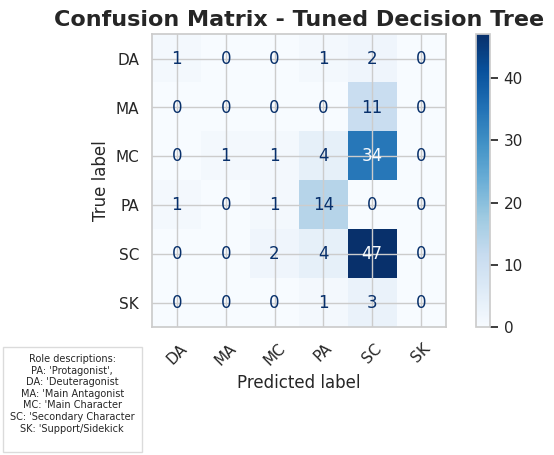

In [ ]:
# Confusion matrix for best model
plt.figure(figsize=(14, 10))
cm = confusion_matrix(y_test_clf, y_pred_dt_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_clf.unique()))
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title('Confusion Matrix - Tuned Decision Tree', fontsize=16, fontweight='bold')
plt.tight_layout()

# Add explanation text
plt.figtext(0.2, 0.01,
            "Role descriptions:\n" +
            "PA: 'Protagonist',\n" +
            "DA: 'Deuteragonist\n" +
            "MA: 'Main Antagonist\n" +
            "MC: 'Main Character\n" +
            "SC: 'Secondary Character\n" +
            "SK: 'Support/Sidekick\n",
            ha="center", fontsize=7, bbox={"facecolor":"white", "alpha":0.8, "pad":5, "edgecolor":"lightgray"})

plt.tight_layout(rect=[0, 0.08, 1, 0.95])

### Confusion Matrix Visualization

This confusion matrix shows the performance of our best classification model across different character role categories, helping us understand where the model excels and where it struggles.

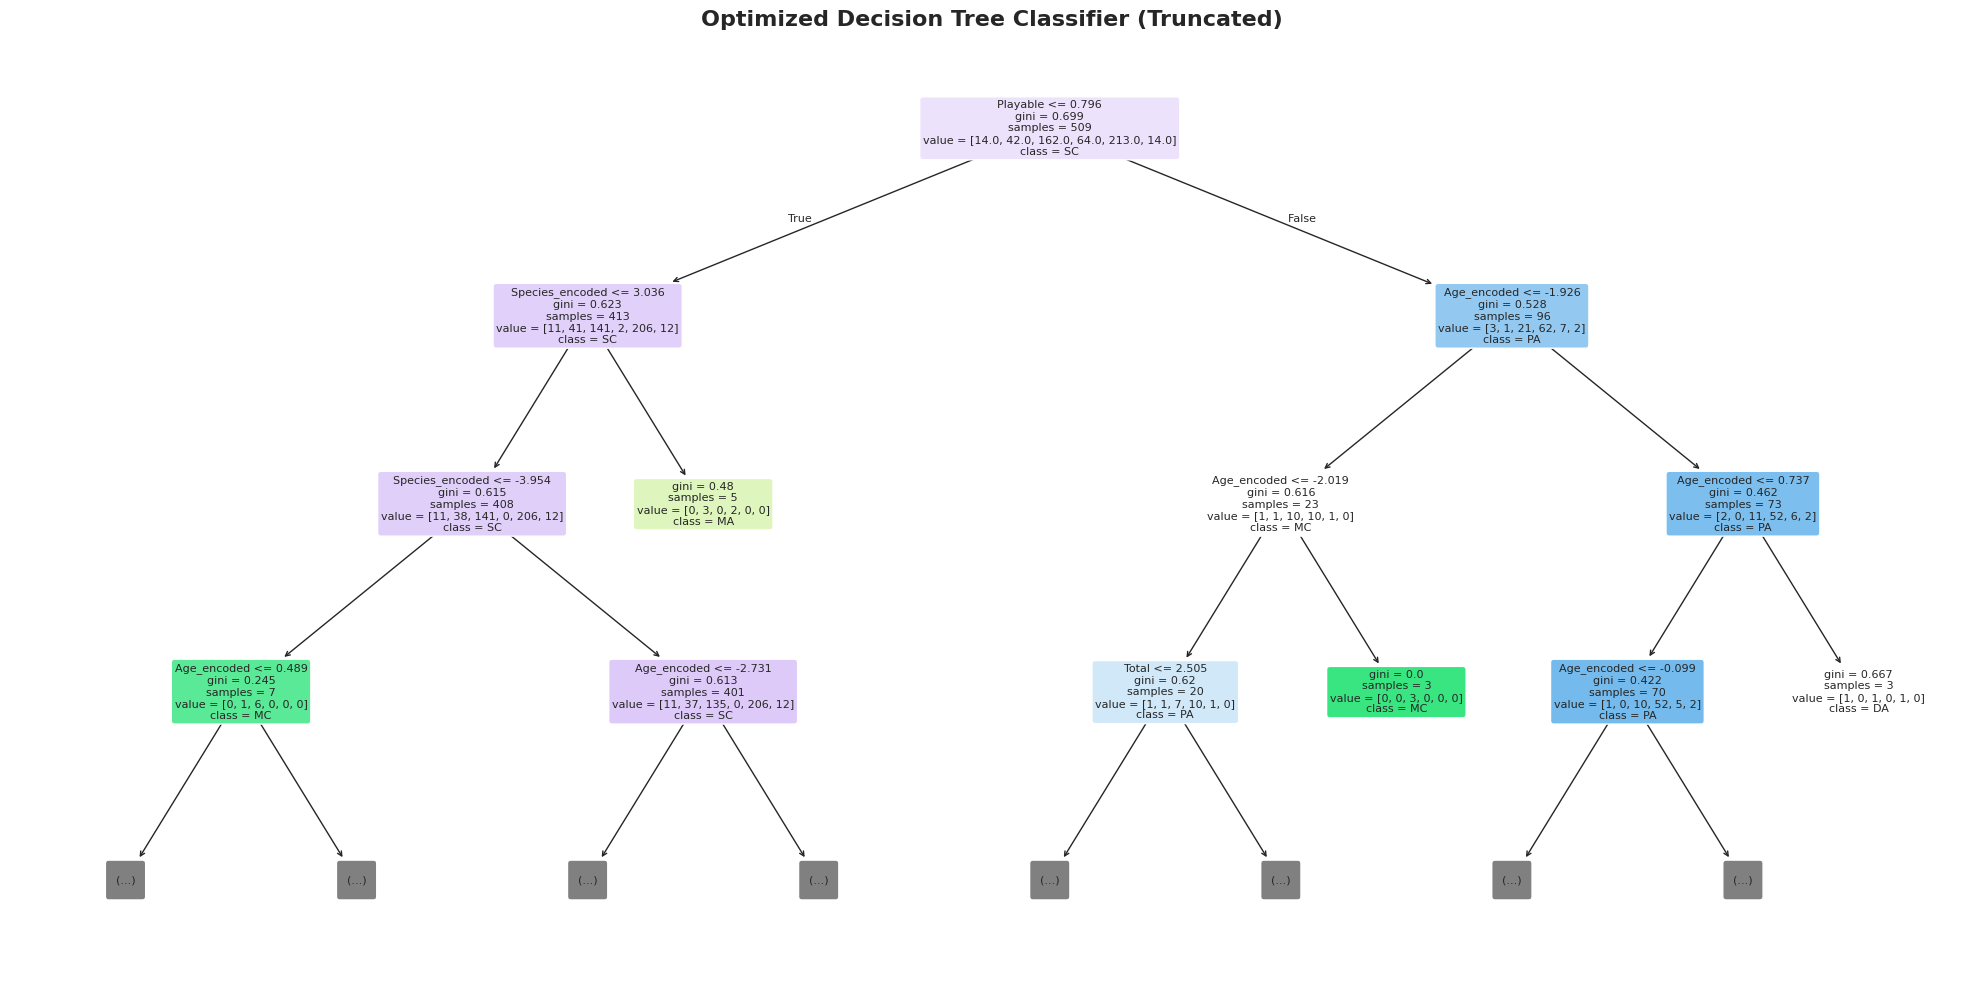

In [ ]:
# Visualize decision tree classifier
plt.figure(figsize=(20, 10))
plot_tree(dt_clf_best, max_depth=3, feature_names=X_clf.columns,
          class_names=sorted(y_clf.unique()), filled=True, rounded=True, fontsize=8)
plt.title('Optimized Decision Tree Classifier (Truncated)', fontsize=16, fontweight='bold')
plt.tight_layout()

### Classification Tree Visualization

This visualization shows the structure of our optimized decision tree classifier (truncated for readability), revealing the decision rules used to predict character roles.


--- FEATURE IMPORTANCE SUMMARY ---
Feature importance for regression models:
                      Linear Regression Coef  Ridge Regression Coef  \
Feature                                                               
Protagonist_Non_Male               -0.116311              -0.027097   
Relevant_males                     -0.074708              -0.011530   
Relevant_no_males                   0.034681              -0.003107   
Percentage_non_male                 0.017468               0.005263   

                      Decision Tree Regressor  
Feature                                        
Protagonist_Non_Male                 0.201755  
Relevant_males                       0.499241  
Relevant_no_males                    0.000000  
Percentage_non_male                  0.299003  


<Figure size 1200x600 with 0 Axes>

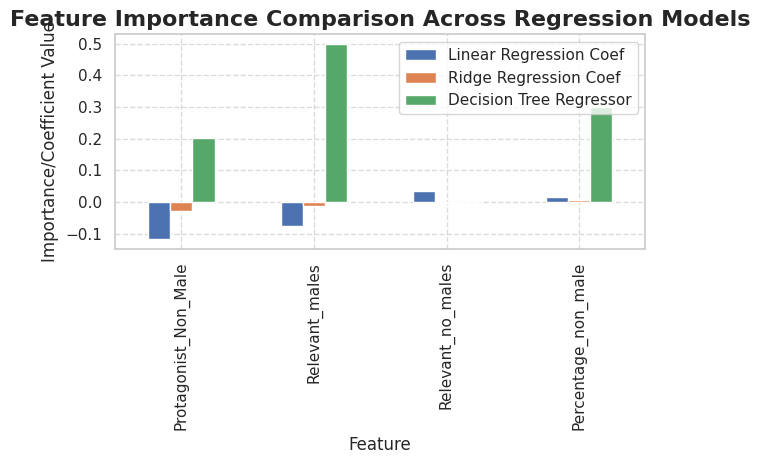

In [ ]:
print("\n--- FEATURE IMPORTANCE SUMMARY ---")
# Combine feature importances from all models
feature_importance_df = pd.DataFrame({
    'Feature': X_reg.columns,
    'Linear Regression Coef': lr.coef_,
    'Ridge Regression Coef': ridge_best.coef_,
    'Decision Tree Regressor': dt_reg_best.feature_importances_
})
print("Feature importance for regression models:")
print(feature_importance_df.set_index('Feature'))

plt.figure(figsize=(12, 6))
feature_importance_df.set_index('Feature').plot(kind='bar')
plt.title('Feature Importance Comparison Across Regression Models', fontsize=16, fontweight='bold')
plt.ylabel('Importance/Coefficient Value')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

## Model Interpretation and Conclusions

### Feature Importance Analysis

This section compares feature importance across different regression models, helping us understand which gender representation features have the strongest influence on game ratings.

## Conclusion

In this analysis, we've explored gender representation in video games through descriptive statistics, visualizations, and machine learning models.

Key findings:

1. **Gender Distribution**: The data shows a significant gender imbalance in video game characters, with male characters being more prevalent and more likely to be playable.

2. **Sexualization Patterns**: There are clear differences in sexualization scores between gender categories, highlighting potential biases in character portrayal.

3. **Regression Analysis**: Our models suggest that gender representation variables have some predictive power for game ratings, though the relationship is complex and influenced by multiple factors.

4. **Classification Analysis**: Character attributes like gender, age, playability, and sexualization can be used to predict character relevance/roles with moderate success.

These insights contribute to our understanding of gender representation in the gaming industry and may be valuable for developers seeking to create more balanced and inclusive games.